In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
#load data
bank_info = pd.read_csv('bank-additional-full.csv', delimiter=";")
dataset = bank_info.drop(bank_info.columns[7:15], axis=1)

In [4]:
dataset.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [23]:
dataset.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [24]:
#calculating the percentage of people having a specific loan (unknown values ignored)
print('The percentage of people having a personal loan in the data is %f%%' % (6248/(6248+33950)*100))
print('The percentage of people having a housing loan in the data is %f%%' % (21576/(21576+18622)*100))

The percentage of people having a personal loan in the data is 15.543062%
The percentage of people having a housing loan in the data is 53.674312%


In [37]:
df_loan = dataset[dataset.loan != 'unknown'].reset_index(drop=True) #drop unknown values in loan
df_housing = dataset[dataset.housing != 'unknown'].reset_index(drop=True) #drop unknown values in housing
df_loan = df_loan.drop('housing', axis=1)
df_housing = df_housing.drop('loan', axis=1)#.housing.replace(['yes','no'], [1, 0])
df_loan.head()

,age,job,marital,education,default,loan,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,no,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,yes,1.1,93.994,-36.4,4.857,5191.0,no


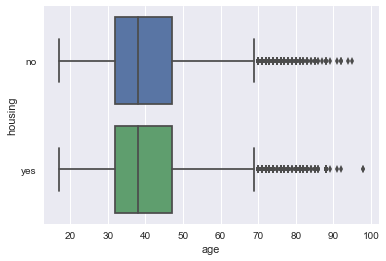

In [26]:
#boxplot on age vs housing
sns.boxplot(df_housing['age'],df_housing['housing'])
sns.despine()

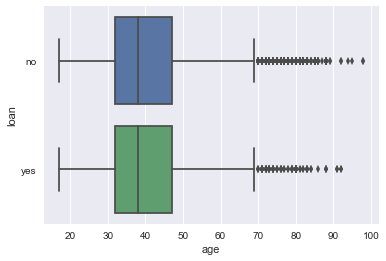

In [29]:
#boxplot on age vs loan
sns.boxplot(df_loan['age'],df_loan['loan'])
sns.despine()

In [31]:
#explore the effect of marital status on having a housing loan or not
h_m = df_housing.groupby(['marital', 'housing']).size().unstack()
h_m['percentage'] = h_m.yes / (h_m.no + h_m.yes)
h_m.sort_values('percentage')#.drop(h_m.columns[0:3], axis = 1).plot(kind='bar')

housing,no,yes,percentage
marital,,,
unknown,44,35,0.443038
married,11389,12951,0.532087
divorced,2092,2399,0.534179
single,5097,6191,0.548459


loan,no,yes,percentage
education,,,
unknown,1449,242,0.143111
basic.6y,1902,330,0.147849
basic.9y,5011,883,0.149813
basic.4y,3435,624,0.153732
professional.course,4325,793,0.154943
high.school,7852,1443,0.155245
university.degree,9961,1930,0.162308
illiterate,15,3,0.166667


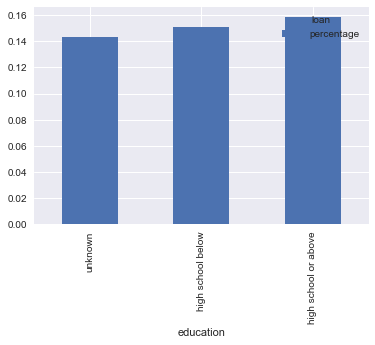

In [73]:
#explore the effect of education level on having a personal loan or not
l_e = df_loan.groupby(['education', 'loan']).size().unstack(0)
l_e['high school or above'] = l_e['high.school'] + l_e['university.degree'] + l_e['professional.course']
l_e['high school below'] = l_e['basic.4y'] + l_e['basic.6y'] + l_e['basic.9y'] + l_e['illiterate']
l_e = l_e.unstack().unstack()
l_e['percentage'] = l_e.yes / (l_e.no + l_e.yes)
l_e1 = l_e.drop(l_e.index[0:7])
l_e2 = l_e.drop(l_e.index[8:10])
l_e1.sort_values('percentage').drop(l_e1.columns[0:2], axis = 1).plot(kind='bar')
l_e2.sort_values('percentage')

housing,no,yes,percentage
education,,,
unknown,816,875,0.517445
basic.4y,1955,2104,0.518354
basic.6y,1070,1162,0.520609
high.school,4363,4932,0.530608
basic.9y,2743,3151,0.534611
university.degree,5387,6504,0.546968
professional.course,2280,2838,0.554513
illiterate,8,10,0.555556


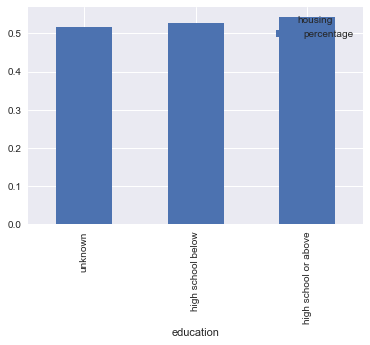

In [74]:
h_e = df_housing.groupby(['education', 'housing']).size().unstack(0)
h_e['high school or above'] = h_e['high.school'] + h_e['university.degree'] + h_e['professional.course']
h_e['high school below'] = h_e['basic.4y'] + h_e['basic.6y'] + h_e['basic.9y'] + h_e['illiterate']
h_e = h_e.unstack().unstack()
h_e['percentage'] = h_e.yes / (h_e.no + h_e.yes)
h_e1 = h_e.drop(h_e.index[0:7])
h_e2 = h_e.drop(h_e.index[8:10])
h_e1.sort_values('percentage').drop(h_e1.columns[0:2], axis = 1).plot(kind='bar')
h_e2.sort_values('percentage')

In [35]:
h_j = df_housing.groupby(['job', 'housing']).size().unstack().fillna(0)
h_j['percentage'] = h_j.yes / (h_j.no + h_j.yes)
h_j.sort_values('percentage')#.drop(h_j.columns[0:3], axis = 1).plot(kind='bar')

housing,no,yes,percentage
job,,,
management,1363,1490,0.522257
blue-collar,4304,4710,0.522521
housemaid,491,540,0.523763
unknown,153,172,0.529231
services,1818,2050,0.529990
retired,784,892,0.532220
self-employed,641,740,0.535844
admin.,4636,5559,0.545267
technician,2980,3616,0.548211


In [36]:
l_j = df_loan.groupby(['job', 'loan']).size().unstack().fillna(0)
l_j['percentage'] = l_j.yes / (l_j.no + l_j.yes)
l_j.sort_values('percentage')#.drop(h_j.columns[0:3], axis = 1).plot(kind='bar')

loan,no,yes,percentage
job,,,
self-employed,1186,195,0.141202
retired,1436,240,0.143198
entrepreneur,1214,206,0.145070
housemaid,877,154,0.149370
technician,5607,989,0.149939
unemployed,838,149,0.150963
blue-collar,7648,1366,0.151542
management,2414,439,0.153873
services,3267,601,0.155377
